In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\Stephen\Downloads\PPRALL.csv")

C:\Users\Stephen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#DATA OVERVIEW

In [7]:
df.head()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [8]:
df.tail()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
548544,12/08/2022,"BALLYBEG, CORRANDULLA, GALWAY",Galway,NaN,110000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548545,12/08/2022,"KILTENNEL, GOREY, COUNTY WEXFORD",Wexford,Y25E4P5,682492.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548546,12/08/2022,"NUMBER 65, CILL BEG MANOR, STRADBALLY",Laois,R32NW66,258000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548547,12/08/2022,"ROSEBORO COTTAGE, ROSEBORO, TIPPERARY",Tipperary,E34K767,145000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548548,12/08/2022,"SHEANE HOUSE, 1 PARK TERRACE, MOUNTMELLICK",Laois,R32TW24,550000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [9]:
df.info()
#548549 entries across 9 columns
# price field is the only Float type
#Eircode and Size Decription have significant data gaps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548549 entries, 0 to 548548
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date of Sale               548549 non-null  object 
 1   Address                    548549 non-null  object 
 2   County                     548549 non-null  object 
 3   Eircode                    54748 non-null   object 
 4   Price                      548549 non-null  float64
 5   Not Full Market Price      548549 non-null  object 
 6   VAT Exclusive              548549 non-null  object 
 7   Description of Property    548549 non-null  object 
 8   Property Size Description  52804 non-null   object 
dtypes: float64(1), object(8)
memory usage: 37.7+ MB


In [10]:
df.duplicated().sum()
#checking for Duplicates
#829 Duplicates found 

829

In [11]:
df.drop_duplicates(keep = False, inplace=True)
#script to delete duplicate vaules 

In [12]:
df.duplicated().sum()
#Re-Check to confimr duplicates removed

0

In [13]:
df.isnull().sum()
#Significant amount of missing data for Eircode and Propert size description
#I will remove both these columns. 

Date of Sale                      0
Address                           0
County                            0
Eircode                      492342
Price                             0
Not Full Market Price             0
VAT Exclusive                     0
Description of Property           0
Property Size Description    494637
dtype: int64

In [14]:
df = df.drop('Eircode', axis=1)

In [15]:
df = df.drop('Property Size Description', axis=1)

In [16]:
df.head()

,Date of Sale,Address,County,Price,Not Full Market Price,VAT Exclusive,Description of Property
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,No,Yes,New Dwelling house /Apartment
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment


In [17]:
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
#converting the Date of Sale to datetime

In [18]:
sales_by_type = df.groupby("Description of Property")["Description of Property"].count()
print (sales_by_type)
#Total Sales by House Type
# The Data has small number of entries in Irish
# I will create a dictionary to overwrite the Irish listings

Description of Property
New Dwelling house /Apartment             89002
Second-Hand Dwelling house /Apartment    457952
Teach/?ras?n C?naithe Nua                     1
Teach/�ras�n C�naithe Ath�imhe               34
Teach/�ras�n C�naithe Nua                     3
Name: Description of Property, dtype: int64


In [19]:
d = {'Teach/�ras�n C�naithe Nua':'New Dwelling house /Apartment', 'Teach/�ras�n C�naithe Ath�imhe' :'Second-Hand Dwelling house /Apartment', 'Teach/?ras?n C?naithe Nua' : 'New Dwelling house /Apartment'}

In [20]:
df = df.replace(d)

In [21]:
sales_by_type = df.groupby("Description of Property")["Description of Property"].count()
print (sales_by_type)
#re-printing with Irish names removed. 

Description of Property
New Dwelling house /Apartment             89006
Second-Hand Dwelling house /Apartment    457986
Name: Description of Property, dtype: int64


In [ ]:
#df['year'] = df.apply(lambda x: '2021' if x['Date of Sale'] >= pd.to_datetime('01/01/2021') 
                      else '2022' if x['Date of Sale'] >= pd.to_datetime('01/01/2022') 
                       else '2011' if x['Date of Sale'] >= pd.to_datetime('01/01/2011')
                      else '2010' if x['Date of Sale'] >= pd.to_datetime('01/01/2010')
                        else '2012' if x['Date of Sale'] >= pd.to_datetime('01/01/2012')
                        else '2013' if x['Date of Sale'] >= pd.to_datetime('01/01/2013')
                      else '2014' if x['Date of Sale'] >= pd.to_datetime('01/01/2014')
                      else '2015' if x['Date of Sale'] >= pd.to_datetime('01/01/2015')
                      else '2016' if x['Date of Sale'] >= pd.to_datetime('01/01/2016')
                       else '2017' if x['Date of Sale'] >= pd.to_datetime('01/01/2017')
                      else '2018' if x['Date of Sale'] >= pd.to_datetime('01/01/2018')
                       else '2019' if x['Date of Sale'] >= pd.to_datetime('01/01/2019')
                            else '2020' if x['Date of Sale'] >= pd.to_datetime('01/01/2020')
                      else'N/A', axis=1)
                    
# I wanted to create a new column with the Year for each sale, the code above works however my laptop does not seem to have the power to run the code and it crashes everytime I run it. 

In [23]:
df1=pd.read_csv(r"C:\Users\Stephen\Downloads\PPRALLYEAR.csv")
# becaue of my laptop crashing I had to create a new file to replicate the code above and add in the year column 

In [24]:
df1.head()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010


In [25]:
df1.tail()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year
548544,12/08/2022,"BALLYBEG, CORRANDULLA, GALWAY",Galway,NaN,110000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548545,12/08/2022,"KILTENNEL, GOREY, COUNTY WEXFORD",Wexford,Y25E4P5,682492.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548546,12/08/2022,"NUMBER 65, CILL BEG MANOR, STRADBALLY",Laois,R32NW66,258000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548547,12/08/2022,"ROSEBORO COTTAGE, ROSEBORO, TIPPERARY",Tipperary,E34K767,145000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548548,12/08/2022,"SHEANE HOUSE, 1 PARK TERRACE, MOUNTMELLICK",Laois,R32TW24,550000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2022


In [26]:
df1.duplicated().sum()

829

In [27]:
df1.drop_duplicates(keep = False, inplace=True)

In [28]:
df1.duplicated().sum()

0

In [29]:
df1 = df1.drop('Eircode', axis=1)

In [30]:
df1 = df1.drop('Property Size Description', axis=1)

In [31]:
df1.set_index('Date of Sale').head(2)
#Changing Index to Date of Sale

,Address,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Year
Date of Sale,,,,,,,
01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010
03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,No,Yes,New Dwelling house /Apartment,2010


In [32]:
df1.head()

,Date of Sale,Address,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Year
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,No,Yes,New Dwelling house /Apartment,2010
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment,2010


In [33]:
df1['Date of Sale'] = pd.to_datetime(df1['Date of Sale'])

In [34]:
df1 = df1.replace(d)

In [35]:
sales_by_type1 = df1.groupby("Description of Property")["Description of Property"].count()
print (sales_by_type1)

Description of Property
New Dwelling house /Apartment             89006
Second-Hand Dwelling house /Apartment    457986
Name: Description of Property, dtype: int64


In [36]:
Sales_By_year = df1.groupby("Year")["Price "].count()
Sales_By_year =  Sales_By_year.sort_index()

Text(0.5, 1.0, 'Sales 2010 - 2022')

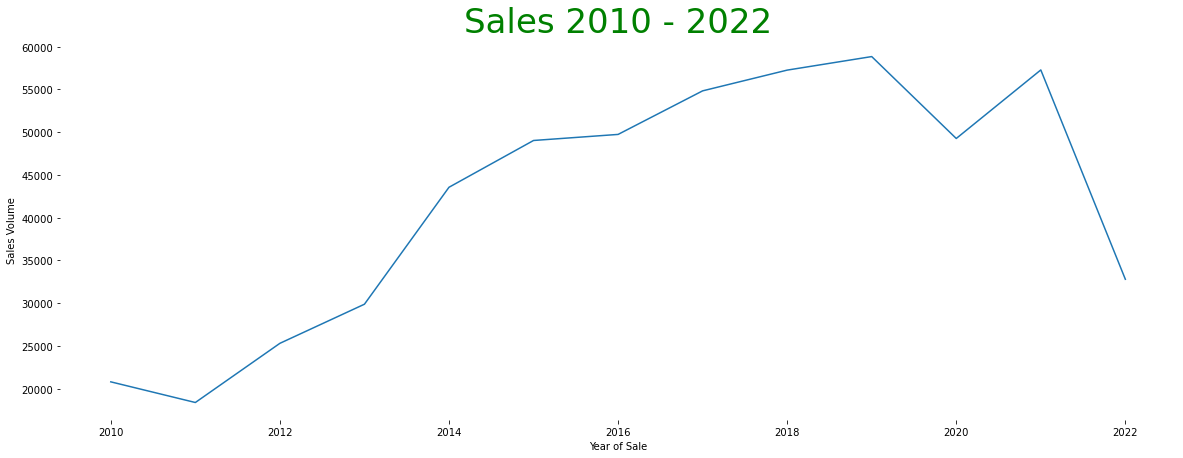

In [37]:
plt.figure(figsize=(20,7))
sns.lineplot(x=Sales_By_year.index, y=Sales_By_year.values)
plt.box(on=None)
plt.ylabel('Sales Volume')
plt.xlabel('Year of Sale')
plt.title("Sales 2010 - 2022", fontsize=34, color='green')

In [57]:
Sales_By_year_Value = df1.groupby("Year")["Price "].sum()
Sales_By_year_Value =  Sales_By_year_Value.sort_index()

In [61]:
Sales_By_Value = df1.groupby("Year")["Price "].sum()
Sales_By_Value =  Sales_By_Value.sort_index()

Text(0.5, 1.0, 'Sales 2010 - 2022')

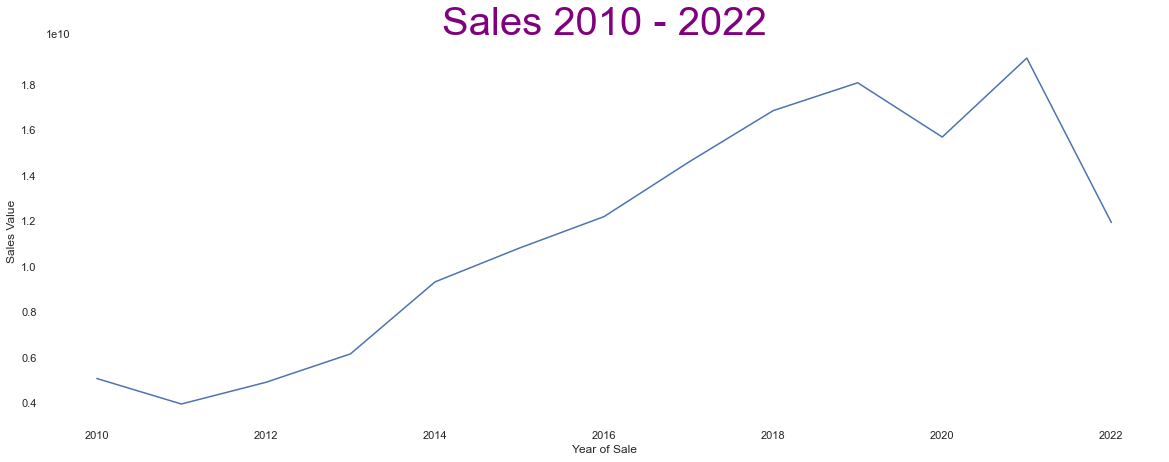

In [63]:
plt.figure(figsize=(20,7))
sns.lineplot(x=Sales_By_Value.index, y=Sales_By_Value.values)
plt.box(on=None)
plt.ylabel('Sales Value')
plt.xlabel('Year of Sale')
plt.title("Sales 2010 - 2022", fontsize=40, color='purple')

In [42]:
pd.options.display.float_format = "{:.2f}".format
# code to stop the Vaule fields truncating 

In [48]:
tablebyCounty = pd.pivot_table(df1,index=['County'],columns=["Year"],values=['Price '],aggfunc=np.mean)
tablebyCounty

Price                                                     \
Year           2010      2011      2012      2013      2014      2015   
County                                                                  
Carlow    174220.63 138192.95 108485.96 112121.14 114349.25 127156.90   
Cavan     142510.33 132172.06 104653.21  81957.32  76354.04  95031.56   
Clare     175999.19 158236.43 131900.07 118604.44 118374.47 124146.77   
Cork      230913.90 198730.11 174365.65 174799.15 178020.18 206426.55   
Donegal   154050.64 129165.58 105875.17  92775.22  91932.14 103815.74   
Dublin    333768.98 309242.59 280549.77 330656.68 359659.60 351354.27   
Galway    223020.77 195593.40 165919.87 156811.80 155512.68 168810.53   
Kerry     187926.56 162211.48 144762.72 131379.01 127385.57 138136.15   
Kildare   240596.58 225333.52 195125.35 198503.38 222738.74 248237.85   
Kilkenny  210497.41 166669.58 138137.23 131891.04 139690.14 164461.92   
Laois     165684.50 125400.47  96057.29  99437.25 101752.41 127169.49   
Leitrim   129262.89 109770.86  97566.66  72035.81  78267.09  90038.45   
Limerick  190272.36 167631.29 148713.52 139299.18 120170.41 137512.54   
Longford  137717.10 100724.46  82972.46  66872.83  68810.08  72301.88   
Louth     190340.45 157540.28 140322.35 128559.91 129243.62 143140.29   
Mayo      158488.82 139792.47 107850.43 109648.18 106284.10 113995.80   
Meath     227012.80 197893.51 177316.79 171454.83 187492.98 211054.67   
Monaghan  153877.47 131142.07 107735.75  92289.66  98555.85 112257.83   
Offaly    160454.32 133356.37 120478.40 100924.77 118295.16 111045.76   
Roscommon 138874.55 106903.60  87474.09  77071.14  75270.74  81355.23   
Sligo     163911.68 167099.85 114736.05 109572.84 115738.78 123608.78   
Tipperary 162157.37 141518.49 123866.44 111964.27 111616.57 122264.61   
Waterford 181576.96 149682.10 125583.64 118959.00 122207.40 130021.21   
Westmeath 159422.72 135536.80 112070.06 107706.42 107792.38 132296.36   
Wexford   179936.37 143034.38 124732.91 115689.14 122933.61 131469.21   
Wicklow   295385.81 246419.44 236219.56 246700.64 262853.19 290302.66   

                                                                       \
Year           2016      2017      2018      2019      2020      2021   
County                                                                  
Carlow    138083.88 148324.81 170782.39 175162.62 208444.37 211740.87   
Cavan     107237.75 121757.35 132654.69 145256.48 161779.75 180721.52   
Clare     167146.77 168409.88 171473.80 187358.06 189387.28 209537.35   
Cork      206544.31 231303.06 280255.60 263033.59 269973.39 280454.19   
Donegal   108250.54 119420.71 119054.28 126491.80 142129.09 152862.10   
Dublin    405078.66 419595.12 469451.01 499158.92 530963.50 543816.68   
Galway    189232.62 211206.51 240664.56 246356.33 249580.00 269023.09   
Kerry     147529.65 154017.17 165753.11 186123.79 203666.83 222348.19   
Kildare   259636.07 265659.65 285016.42 303326.68 313739.68 349575.36   
Kilkenny  179174.67 179869.05 201591.57 214876.32 222796.29 251394.31   
Laois     155578.57 153972.95 162030.71 175823.96 201222.58 236396.45   
Leitrim    88699.87 100139.50 112012.08 115669.30 124959.44 141351.78   
Limerick  144087.08 165336.01 193696.27 198172.36 214257.57 239561.08   
Longford   83278.53  96189.74 105034.36 123392.06 133132.06 162762.74   
Louth     165069.40 228162.30 205077.29 216454.55 220705.54 250051.89   
Mayo      113193.15 131098.76 133449.36 140305.86 144982.07 163884.10   
Meath     225406.14 246897.40 264741.31 277392.83 284888.86 309618.04   
Monaghan  118401.84 137742.13 145551.47 152511.10 157602.40 168859.20   
Offaly    117164.16 142104.13 151828.08 159854.14 167180.04 190503.91   
Roscommon  91893.53 108462.26 115968.83 125670.31 121024.04 146424.56   
Sligo     116240.95 135831.91 139467.39 149192.98 147185.45 175512.44   
Tipperary 126424.96 133112.56 147504.60 159749.28 157219.36 182423.75   
Waterford 139110.59 153521.25 175113.43 192574.49 198653.92 212297.41 

In [49]:
avg_Price_By_County = df1.groupby("County")["Price "].mean()
print(avg_Price_By_County)

County
Carlow      162968.17
Cavan       128994.41
Clare       168898.12
Cork        237575.67
Donegal     124235.38
Dublin      431974.08
Galway      215101.40
Kerry       171008.73
Kildare     280144.50
Kilkenny    194767.78
Laois       163873.63
Leitrim     107781.45
Limerick    179773.23
Longford    107573.65
Louth       193915.79
Mayo        134372.07
Meath       251987.24
Monaghan    138804.96
Offaly      149817.89
Roscommon   112300.21
Sligo       141252.83
Tipperary   146836.82
Waterford   170156.51
Westmeath   162212.61
Wexford     171442.60
Wicklow     333604.68
Name: Price , dtype: float64


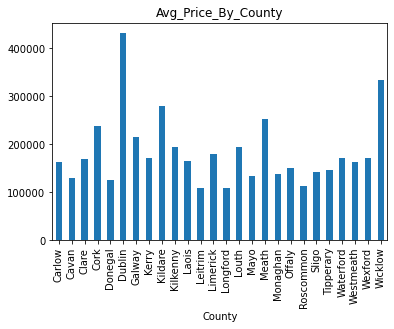

In [50]:
avg_Price_By_County.plot(kind="bar", title="Avg_Price_By_County")
plt.show()

In [47]:
tablebytype = pd.pivot_table(df1,index=['Year'],columns=["Description of Property"],values=['County'],aggfunc='count')
tablebytype

County  \
Description of Property New Dwelling house /Apartment   
Year                                                    
2010                                             5272   
2011                                             2941   
2012                                             3169   
2013                                             3609   
2014                                             5406   
2015                                             6214   
2016                                             6824   
2017                                             9341   
2018                                            11069   
2019                                            11318   
2020                                             9378   
2021                                             9061   
2022                                             5404   

                                                               
Description of Property Second-Hand Dwelling house /Apartment  
Year                                                           
2010                                                    15526  
2011                                                    15441  
2012                                                    22136  
2013                                                    26271  
2014                                                    38153  
2015                                                    42818  
2016                                                    42917  
2017                                                    45496  
2018                                                    46194  
2019                                                    47529  
2020                                                    39888  
2021                                                    48223  
2022                                                    27394

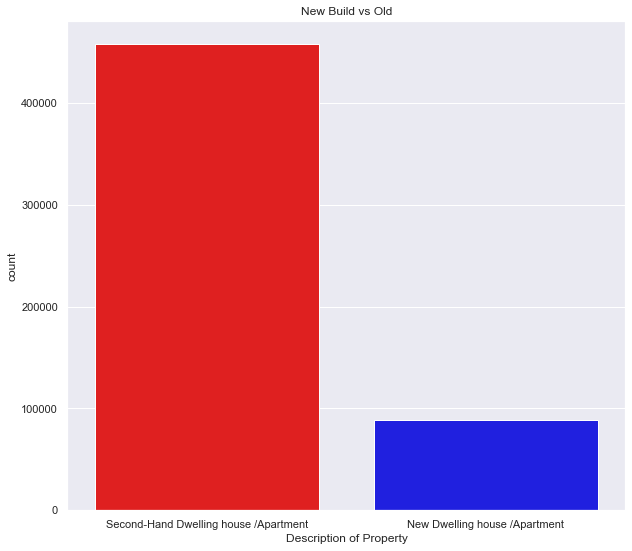

In [51]:
plt.figure(figsize=(10,9))
sns.set(style="darkgrid")
plt.title("New Build vs Old")
ax = sns.countplot(x="Description of Property", data=df1, palette=('Red','Blue','Green'))

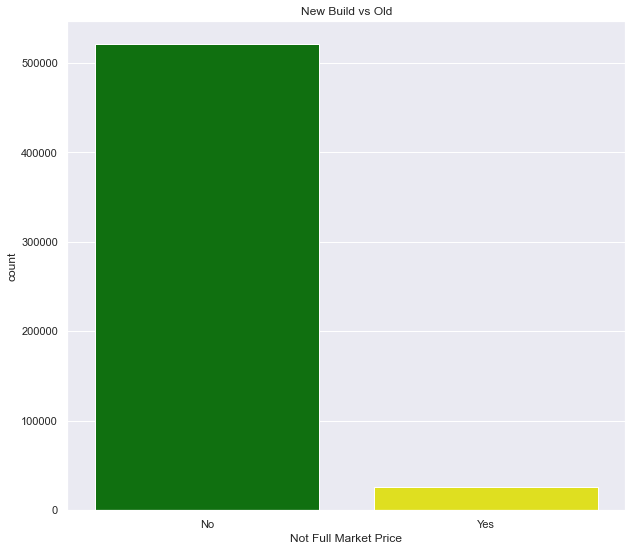

In [52]:
plt.figure(figsize=(10,9))
sns.set(style="darkgrid")
plt.title("New Build vs Old")
ax = sns.countplot(x="Not Full Market Price", data=df1, palette=('Green','Yellow',))

In [53]:
ND=pd.read_csv(r"C:\Users\Stephen\Downloads\Ireland New Dwelling completions 2011-2019.csv")

In [54]:
ND.head()

,Year,Single,Scheme,Apartment
0,2011,"4,814",1358,822
1,2012,"3,501",964,446
2,2013,"2,947",1155,473
3,2014,"2,975",1795,748
4,2015,"3,294",3294,673


In [55]:
NewBuilds_df = pd.merge(df1,ND, how='inner', on ='Year')
NewBuilds_df.head()

,Date of Sale,Address,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Year,Single,Scheme,Apartment
0,2011-01-01,"251 Clontarf Road, Clontarf",Dublin,108532.00,Yes,No,Second-Hand Dwelling house /Apartment,2011,"4,814",1358,822
1,2011-04-01,"1 Lenaboy Gardens, Salthill",Galway,300000.00,No,No,Second-Hand Dwelling house /Apartment,2011,"4,814",1358,822
2,2011-04-01,"1 The Standing Stone, Clongeen",Wexford,143000.00,No,No,Second-Hand Dwelling house /Apartment,2011,"4,814",1358,822
3,2011-04-01,"15 Frenchville, Grattan Road, Galway",Galway,330000.00,No,No,Second-Hand Dwelling house /Apartment,2011,"4,814",1358,822
4,2011-04-01,"20 Victoria Court, West End, Kilkee",Clare,175000.00,No,No,Second-Hand Dwelling house /Apartment,2011,"4,814",1358,822


In [56]:
Summary_by_year_df = NewBuilds_df.groupby([ "Year" , "Single ", "Scheme", "Apartment"])['County'].agg('count').reset_index(name="Total House Sales")
print (Summary_by_year_df)

   Year Single   Scheme  Apartment  Total House Sales
0  2011   4,814    1358        822              18382
1  2012   3,501     964        446              25305
2  2013   2,947    1155        473              29880
3  2014   2,975    1795        748              43559
4  2015   3,294    3294        673              49032
5  2016   3,657    5068       1161              49741
6  2017   4,250    7886       2217              54837
7  2018   4,682   10982       2820              57263
8  2019   5,067   12516       3550              58847


Text(0.5, 1.0, 'Summary By Year')

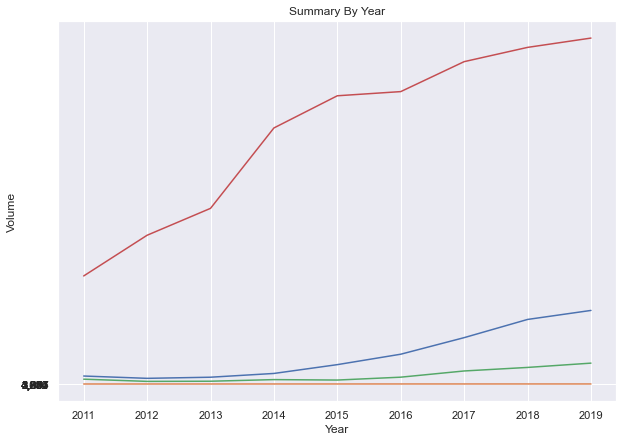

In [58]:
plt.subplots(figsize=(10,7))

plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Scheme'])
plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Single '])
plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Apartment'])
plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Total House Sales'])


plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Summary By Year New Builds vs Sales')

In [60]:
df1.sort_values(by=['Price '],inplace=True , ascending = False)
df1.head(20)
#Top 20 Most Expensive Sales
#Most seem to be full blocks of new builds or commerical units

,Date of Sale,Address,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Year
430733,2020-07-17,"Apartments 1 - 186 Cheevers Court, Apartments ...",Dublin,182378854.63,No,Yes,New Dwelling house /Apartment,2020
472738,2021-04-15,"8th Lock, Ratoath Road, Pelletstown",Dublin,170142820.00,No,Yes,New Dwelling house /Apartment,2021
408809,2019-12-23,"Blocks A and C, The Point Campus",Dublin,142256576.05,No,Yes,New Dwelling house /Apartment,2019
316318,2018-06-22,"COMMERCIAL PROPERTY AND, 423 RESI UNITS AT CLA...",Dublin,139165000.00,Yes,No,Second-Hand Dwelling house /Apartment,2018
455636,2020-12-17,"Block A and Block C, THE POINT CAMPUS, DUBLIN 1",Dublin,134261047.00,Yes,No,Second-Hand Dwelling house /Apartment,2020
378927,2019-07-19,"266 Apts & 18 Commercial Units, Heuston South ...",Dublin,129500000.00,No,No,Second-Hand Dwelling house /Apartment,2019
428922,2020-06-30,"Residential & Commercial Units, Heuston South ...",Dublin,123800000.00,No,No,Second-Hand Dwelling house /Apartment,2020
415811,2020-02-27,"APARTMENT 1 - 197 NEPTUNE BLOCK, HONEYPARK, DU...",Dublin,114440820.00,No,No,Second-Hand Dwelling house /Apartment,2020
543383,2022-01-07,"Apartments 1 - 297, Blackwood Square, Northwood",Dublin,109055078.00,No,Yes,New Dwelling house /Apartment,2022
532320,2022-04-26,"Site at Barnoaks development, Citywest road, C...",Dublin,107488987.00,No,Yes,New Dwelling house /Apartment,2022
